# <b>Fondamenti di Analisi Dati</b> - a.a. 2020/2021

# 14.1 Support Vector Machines (SVM)

Una Support Vector Machine (SVM) è un classificatore binario. In maniera simile a quanto fatto da altri classificatori (per esempio, il regressore logistico e il discriminante di Fisher), una SVM classifica un vettore $\mathbf{x}$ mediante una funzione lineare parametrica detta **funzione di decisione**:

\begin{equation}
y(\mathbf{x})=\mathbf{w}^T \phi(\mathbf{x}) + b
\end{equation}

dove $\phi$ è una funzione di rappresentazione che mappa i punti $\mathbf{x}$ in uno spazio generalmente **non lineare** e **di dimensionalità più alta** di quella di $\mathbf{x}$, mentre $w$ e $b$ sono i parametri della funzione, che vengono ottimizzati a partire dai dati di training. Quando si allena una SVM, le due classi vengono generalmente chiamate "classe positiva" e "classe negativa". Un vettore $\mathbf{x}$ verrà classificato come appartenente alla classe positiva se $y(\mathbf{x})=\mathbf{w}^T \mathbf{\phi(x)} + b \geq 0$ o come appartenente alla classe negativa se $y(\mathbf{x})=\mathbf{w}^T \mathbf{\phi(x)} + b < 0$.

La funzione di rappresentazione $\phi$ permette di rendere SVM un classificatore non lineare. Nel caso più semplice in cui vogliamo definire un classificatore lineare, possiamo sostituire a $\phi$ la funzione identità. In tal caso la funzione di decisione diventerebbe:

\begin{equation}
y(\mathbf{x})=\mathbf{w}^T \mathbf{x} + b
\end{equation}

Ci occuperemo dapprima di SVM lineari.

Come abbiamo già visto nel caso del discriminante di Fisher, classificare elementi utilizzando la funzione lineare $y$ è equivalenete a definire un **decision boundary** ortogonale al vettore $\mathbf{w}$ e con distanza dall'origine pari a $\frac{b}{||\mathbf{w}||}$. Inoltre i punti che si trovano sul **decision boundary** soddisfano l'equazione:

\begin{equation}
\mathbf{w}^T \mathbf{x} + b = 0
\end{equation}

Queste proprietà sono esemplificate nel grafico seguente (caso lineare):

<br>
<center>
<img src="boundary0.png" width="500px">
(Sorgente: Wikipedia)</center>

Per istanziare il classificatore binario, bisogna dunque trovare i pesi $\mathbf{w}$ e $b$ che definiscono la posizione e l'orientamento del decision boundary (una retta del piano nel caso bidimensionale). Fisher propone di minimizzare la varianza intra-classe e massimizzare la varianza inter-classe per trovare tali pesi. SVM invece fa una considerazione geometrica. Dato un unsieme di campioni di training, SVM definisce il decision boundary ottimale come quello che presenta il **massimo margine**, dove il margine è definito come **la distanza minima tra il decision boundary e uno qualsiasi dei campioni**. 

Notiamo che la scala dei valori assunti dalla funzione $y(\mathbf{x})$ è irrilevante ai fini della classificazione. Infatti una qualsiasi funzione $y'(\mathbf{x}) = k\mathbf{w}^T \mathbf{x} + kb$, con $k$ costante positiva non nulla, sarebbe equivalente a $y(\mathbf{x})$ (il segno di $y$ non cambia). Pertanto, senza perdere di generalità, si definisce il margine essere uguale a $\frac{1}{||\mathbf{W}||}$, da cui segue che i punti del training set a distanza minima dal decision boundary rispettano le due equazioni:

 * $\mathbf{w}^T \mathbf{x} + b = 1$ (punti a minima distanza dal decision boundary appartenenti alla classe "positiva")
 * $\mathbf{w}^T \mathbf{x} + b = -1$ (punti a minima distanza dal decision boundary appartenenti alla classe "negativa")
 
dove $\mathbf{w}$ ha modulo unitario.
 
Tutte queste considerazioni sono riassunte nel grafico mostrato sotto (caso lineare e bidimensionale):

<br>
<center>
<img src="svm_boundary0.png" width="500px">
(Sorgente: Wikipedia)</center>

I pesi ottimali di $\mathbf{w}$ e $b$ possono essere ottenuti massimizzando il margine $\frac{1}{||\mathbf{w}||}$ (questo corrisponde a minimizzare $||\mathbf{w}||^2$) sotto determinati vincoli, risolvendo il seguente problema di ottimizzazione:

\begin{eqnarray}
 \min_{\mathbf{w},b} \frac{1}{2} ||\mathbf{w}||^2 \\
  subject\ to\ \ \ t_i (\mathbf{w}^T \phi(\mathbf{x}_i) + b) \geq 1, \ \ \forall i=1,\ldots,N
\end{eqnarray}

dove:
* $\{x_i\}_{i=1}^N$ sono i vettori di training;
* $t_i$ sono le etichette dei dati di training. Se $\mathbf{x}_i$ appartiene alla classe positiva, allora $t_i=1$, altrimenti $t_i=-1$.

Nel caso in cui i dati non siano separabili, alcuni dei vincoli del problema scritto sopra non potranno essere soddisfattti. Per permettere a SVM di trovare un decision boundary _ragionevole_ anche in questi casi, i vincoli vengono rilassati introducendo delle variabili dette "slack variables" (variabili di "allentamento") $\varepsilon_i$. Ognuno dei vincoli viene dunque reso "soft" come segue:

\begin{eqnarray}
t_i (\mathbf{w}^T \phi(\mathbf{x}_i) + b) \geq 1 - \varepsilon_i
\end{eqnarray}

Inoltre, si impone che $\varepsilon_i>=0$. 

L'introduzione delle variabili slack permette di trovare delle soluzioni in cui alcuni punti che non sono stati classificati correttamente, definendo dunque quello che viene spesso chiamato "soft margin" (a differenza del margine classico, generalmente definito come "hard margin"). Per i campioni di training che possono essere correttamente classificati verrà trovata una variabile slack $\varepsilon_i=0$. Se invece il campione non può essere classificato correttamente, sarà necassario definire una variabile slack $\varepsilon_i$ dal valore alto. Scegliendo valori delle variabili slack molto grandi, potremmo trovare una soluzione degenere in cui i vincoli risultano rispettati per qualsiasi coppia di valori $t_i$ e $\mathbf{x}_i$. Ciò porterebbe all'overfitting del modello. Per penalizzare l'assegnamento di variabili slack troppo grandi, si introduce nell'obiettivo di classificazione la penalità:

\begin{equation}
C\sum_{i=1}^N \varepsilon_i
\end{equation}

dove il parametro $C$ controlla il trade-off tra la penalizzazione delle variabili di slack e l'ottimizzazione del margine. Valori alti di $C$ penalizzano molto le variabili di slack e dunque **portano a un hard margin**. Valori bassi di $C$ **portano a un soft margin**.

Il problema di ottimizzazione viene dunque riscritto come segue:

\begin{eqnarray}
 \min_{\mathbf{w},b} \frac{1}{2} ||\mathbf{w}||^2 + C\sum_{i=1}^N \varepsilon_i\\
 subject\ to\ \ \ t_i (\mathbf{w}^T \phi(\mathbf{x}_i) + b) \geq 1 - \varepsilon_i, \ \ \forall i=1,\ldots,N
\end{eqnarray}

Per poter applicare il cosiddetto "kernel trick", SVM ridefinisce il vettore $\mathbf{w}$ come una combinazione lineare di tutti i dati di training $\{x_i\}_{i=1}^N$:

\begin{equation}
\mathbf{w} = \sum_{i=1}^N \alpha_i \cdot t_i \cdot \phi(\mathbf{x}_i)
\end{equation}

dove:
 * $\alpha_i$ sono i pesi della combinazione lineare. Verranno trovati dall'algoritmo di ottimizzazione che permette di allenare il modello SVM;
 * $t_i$ sono le etichette dei dati di training. Se $\mathbf{x}_i$ appartiene alla classe positiva, allora $t_i=1$, altrimenti $t_i=-1$;
 * $\mathbf{x}_i$ sono i vettori di training.

I pesi $\alpha_i$ vengono trovati risolvendo un problema di ottimizzazione detto "duale". La classificazione di un nuovo elemento $\mathbf{x}$ viene dunque effettuata utilizzando la funzione di decisione riparametrizzata come segue:

\begin{equation}
y(\mathbf{x}) = \sum_{i=1}^N \alpha_i \cdot t_i  \cdot \phi(\mathbf{x}_i) \cdot \phi(\mathbf{x}) + b
\end{equation}

La funzione di rappresentazione $\phi$ viene scelta in modo tale che esista una funzione detta "kernel" che non richieda di proiettare i punti $\mathbf{x}$ esplicitamente mediante $\phi$, tale che:

\begin{equation}
K(\mathbf{x}_i, \mathbf{x}_j) = \phi(\mathbf{x}_i) \cdot \phi(\mathbf{x}_j), \forall \mathbf{x}_i, \mathbf{x}_j \in \Re^D
\end{equation}

dove $D$ è la dimensionalità dei dati. Scelta l'appropriata funzione kernel $K$, la funzione di decisione diventa:

\begin{equation}
y(\mathbf{x}) = \sum_{i=1}^N \alpha_i \cdot t_i  \cdot K(\mathbf{x}_i,\mathbf{x}) + b
\end{equation}

La funzione di decisione così riformulata può sembrare inefficiente, dato che è necessario tenere in memoria l'intero training set per poter fare inferenza. Tuttavia, i coefficienti $\alpha_i$ risultano generalmente essere sparsi (ovvero, molti di questi coefficienti saranno pari a zero). E' dunque sufficiente memorizzare i vettori di training corrispondenti ai valori non nulli $\alpha_i$. Tali vettori vengono detti **vettori di supporto**. Inoltre, la formulazione mediante la funzione kernel $K$ permette:
 * di evitare di proiettare i campioni esplicitamente mediante $\phi$;
 * di lavorare implicitamente in spazi con un numero di dimensioni molto alto (potenzialmente infinito).
 
Si noti che, dato che $K$ è una funzione generalmente non lineare, la funzione di decisione è anch'essa generalmente non lineare, il che fa di SVM un classificatore non lineare.

## 14.2 SVM Lineare

Iniziamo allenando un SVM lineare. Carichiamo il dataset delle iris di Fisher:

In [1]:
from statsmodels.datasets import get_rdataset
fisher = get_rdataset('iris')
fisher.data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Modifichiamo il dataset in modo da tenere solo due colonne e due classi:

In [3]:
import pandas as pd
#eliminiamo la classe virginica
data = fisher.data.where(fisher.data.Species!='virginica').dropna()
#costruiamo un dataframe vuoto
df = pd.DataFrame()
#inserieamo le prime due feature e chiamiamole X e Y
df['X'] = data['Sepal.Length']
df['Y'] = data['Sepal.Width']
#inseriamo una colonna "C" che contenga le classi
df['C'] = data['Species']

data = df
data.head()

,X,Y,C
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa


Visualizziamo i campioni nello spazio 2D:

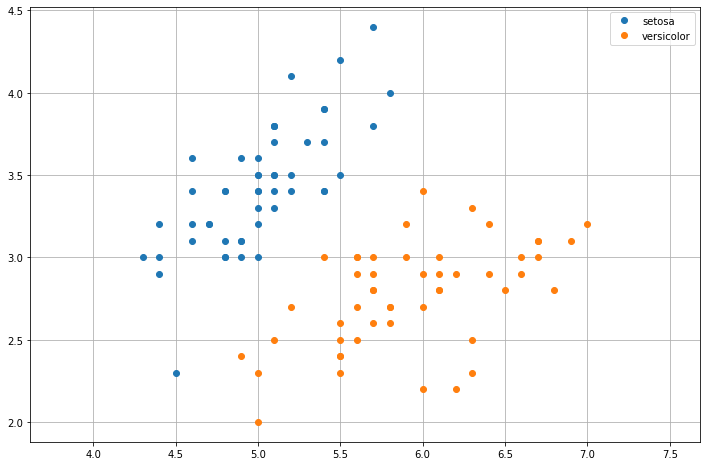

In [4]:
from matplotlib import pyplot as plt
def plot2d(data):
    classes = data['C'].unique()
    for c in classes:
        plt.plot(data.where(data['C']==c).dropna()['X'].values,
                 data.where(data['C']==c).dropna()['Y'].values,'o', label=c)

    plt.axis('equal')
    plt.grid()

plt.figure(figsize=(12,8))
plot2d(data)
plt.legend()
plt.show()

Utilizziamo **scikit-learn** per allenare un classificatore SVM lineare.

In [5]:
#importiamo SVC (Support Vector Classifier)
from sklearn.svm import SVC

#costruiamo il classificatore specificando un kernel lineare
#In questa fase impostiamo un parametro C alto in modo da penalizzare
#molto le variabili slack e ottenere un hard margin classico
svm = SVC(kernel='linear',C=100)
#allenaniamo il modello
svm.fit(data.drop(['C'], axis=1), data['C'])

SVC(C=100, kernel='linear')

Possiamo valutare le performance del classificatore mediante il metodo **score**:

In [5]:
print("Accuracy sul training set: %0.2f" % svm.score(data.drop(['C'], axis=1), data.C))

Accuracy sul training set: 1.00


Il classificatore è riuscito a classificare correttamente tutti i dati di training. Cerchiamo di capire cosa sta accadendo in termini geometrici. Come detto prima, il classificatore ha trovato un iperpiano (una retta nel caso 2D) che separa i campioni di training mantendo il massimo margine. Il decision boundary ha equazione:

\begin{equation}
w_1 x + w_2 y +b = 0
\end{equation}

dove $\mathbf{w}=[w_1,w_2]$ e $b$ sono i pesi trovati da SVM, mentre $x$ e $y$ sono le feature dei dati in input. Abbiamo detto che è possibile ottenere $\mathbf{w}$ come combinazione lineare dei vettori di supporto e dei pesi $\alpha_i$:

\begin{equation}
\mathbf{w} = \sum_{i=1}^N \alpha_i \cdot t_i \cdot \phi(\mathbf{x}_i)
\end{equation}

Possiamo accedere ai vettori di supporto e ai coefficienti $\alpha_i$ del problema duale come segue:

In [6]:
print("Vettori di supporto:\n",svm.support_vectors_)
print("Coefficienti del problema duale:\n",svm.dual_coef_)

Vettori di supporto:
 [[5.5 3.5]
 [4.5 2.3]
 [4.9 2.4]
 [5.4 3. ]]
Coefficienti del problema duale:
 [[-15.44361663 -18.36202074  17.32736257  16.47827481]]


L'algoritmo di training ha trovato $4$ vettori di supporto e $4$ coefficienti $\alpha_i$. Ricordiamo che i vettori di supporto sono effettivamente dei dati di training. Otteniamo i pesi $\mathbf{w}$ calcolando la combinazione lineare:

In [7]:
w = (svm.dual_coef_.T*svm.support_vectors_).sum(0)
print(w)

[ 6.31777572 -5.26481134]


Lo stesso risultato si può ottenere utilizzando la proprietà **svm.coef_**:

In [8]:
print(svm.coef_)

[[ 6.31777572 -5.26481134]]


Il parametro $b$ è invece accessibile come segue:

In [9]:
b = svm.intercept_
print(b)

[-17.32124155]


Visualizziamo adesso i dati di training, i vettori di supporto e le tre rette:
 
 * $w_1 x + w_2 y +b = 0$: decision boundary;
 * $w_1 x + w_2 y +b = 1$: margine positivo;
 * $w_1 x + w_2 y +b = -1$: margine negativo.
 
Per visualizzare le rette utilizzeremo le corrispettive equazioni esplicite:

 * $y = - \frac{w_1}{w_2} x - \frac{b}{w_2}$: decision boundary;
 * $y = - \frac{w_1}{w_2} x - \frac{b-1}{w_2}$: margine positivo;
 * $y = - \frac{w_1}{w_2} x - \frac{b+1}{w_2}$: margine negativo.

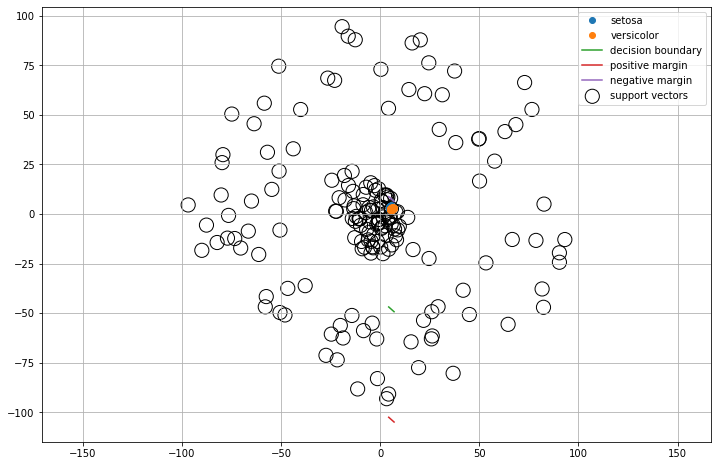

In [10]:
import numpy as np

def project(x,w,b):
    return -w[0]/w[1]*x-b/w[1]

def plot2dall(data,svm):
    w = (svm.dual_coef_.T*svm.support_vectors_).sum(0)
    b = svm.intercept_

    plot2d(data)

    plt.scatter(svm.support_vectors_[:,0], svm.support_vectors_[:,1], 200,
                facecolors='none',edgecolors='k', label='support vectors')

    x=np.array([data.X.min(),data.X.max()])

    plt.plot(x,project(x,w,b), label='decision boundary')
    plt.plot(x,project(x,w,b-1), label='positive margin')
    plt.plot(x,project(x,w,b+1), label='negative margin')

plt.figure(figsize=(12,8))
plot2dall(data,svm)
plt.legend()
plt.show()

Abbiamo visto che la variabile $C$ permette di rendere "soft" i vincoli che impongono che i dati di training siano tutti fuori dal "corridoio" definito dal decision boundary e dal margine. Vediamo cosa succede specificando un valore diverso di $C$:

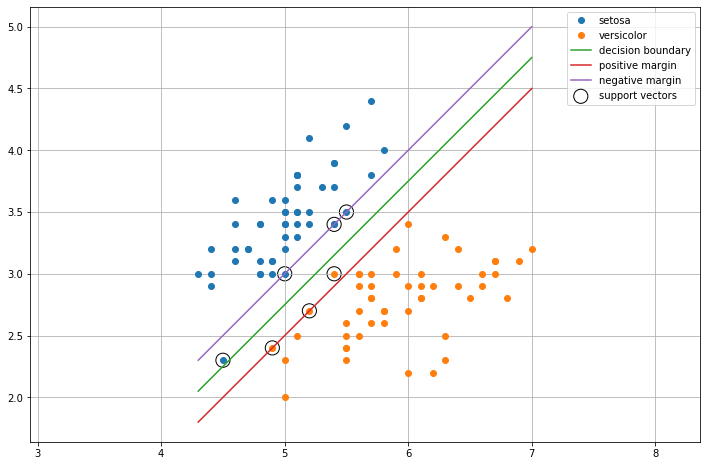

In [11]:
svm = SVC(kernel='linear',C=10)
svm.fit(data.drop(['C'], axis=1), data.C)

plt.figure(figsize=(12,8))
plot2dall(data,svm)
plt.legend()
plt.show()

## 14.3 SVM non Lineare

Abbiamo visto un semplice caso di dati linearmente separabili. Tuttavia, esistono casi in cui i dati sono separabili solo mediante funzioni di decisione non lineari. Prendiamo ad esempio il seguente dataset bidimensionale:

In [6]:
rings = pd.read_csv('rings.csv')
rings.head()

,X,Y,C
0,-9.929224,-5.783568,-1
1,4.384001,9.712273,-1
2,5.670451,2.599445,-1
3,-0.729728,-4.303122,-1
4,-22.451126,1.430808,-1


Vediamo come si dispongono i dati nello spazio 2D:

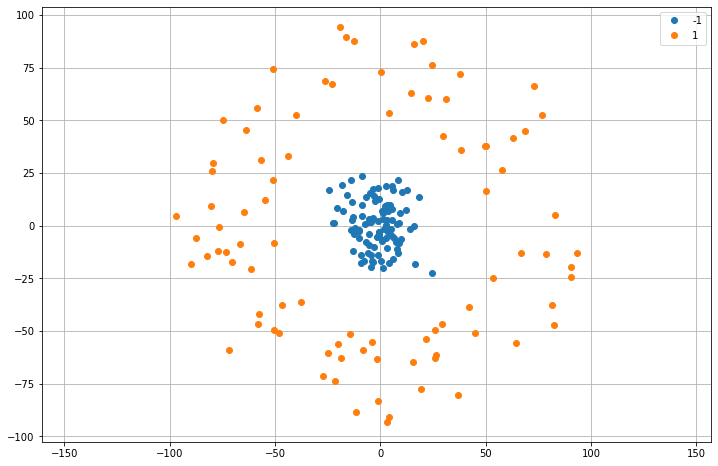

In [7]:
plt.figure(figsize=(12,8))
plot2d(rings)
plt.legend()
plt.show()

I dati sono chiaramente separabili, ma non mediante una funzione lineare.

Proviamo ad allenare un classificatore SVM lineare su questi dati:

In [15]:
svm = SVC(kernel='linear',C=10)
svm.fit(rings.drop(['C'],axis=1),rings['C'])

SVC(C=10, kernel='linear')

Calcoliamo l'accuracy e mostriamo la soluzione a schermo:

Accuracy su training set: 0.73


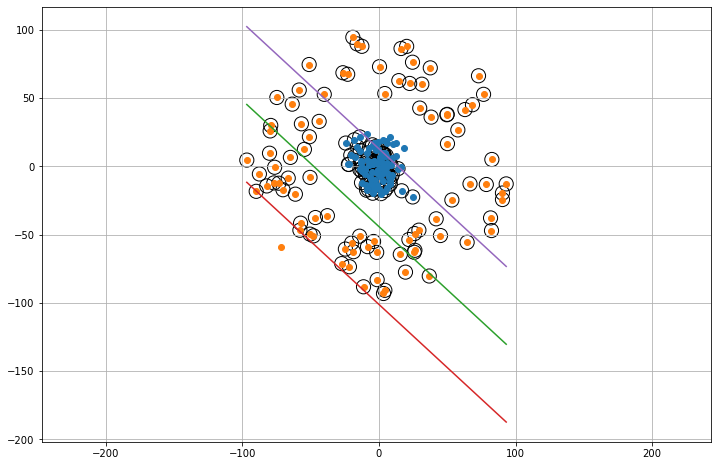

In [16]:
print("Accuracy su training set: %0.2f" % svm.score(rings.drop(['C'],axis=1),rings['C']))

plt.figure(figsize=(12,8))
plot2dall(rings,svm)
plt.show()

### 14.3.1 Proiezione in uno Spazio a più Dimensioni (3D)

Per risolvere il problema, potremmo cercare di ricondurlo a un problema di classificazione lineare. Possiamo ad esempio immaginare che i dati non siano linearmente separabili perché frutto di una proiezione da uno spazio 3D non noto a uno spazio 2D. Quindi viceversa possiamo immaginare che esista un modo per trasformare questi dati 2D in dati 3D linearmente separabili.

Se $x$ e $y$ sono le due dimensioni dei dati in input, proviamo ad esempio a proiettare i dati in uno spazio 3D di coordinate $X, Y, Z$ in cui:

\begin{equation}
X = x \\
Y = y \\
Z = G(x,y; \sigma)=\exp(-( \frac{x^2}{2\sigma^2} + \frac{y^2}{2\sigma^2}))
\end{equation}

Dove $Z$ è il valore che assume una Gaussiana 2D G di varianza $\sigma^2$ e centrata nell'origine nel punto 2D di coordinate $x$ e $y$. Vediamo di applicare la trasformazione e costruire un nuovo dataframe:

In [17]:
#copiamo il dataframe
rings3d = rings.copy()

s =35 # definiamo la varianza della gaussiana
rings3d['Z'] = np.exp(-((rings.X**2/(2*s**2))+(rings.Y**2/(2*s**2))))

#riordiniamo le colonne del dataframe
rings3d = rings3d[['X','Y','Z','C']]

rings3d.head()

,X,Y,Z,C
0,-9.929224,-5.783568,0.947533,-1
1,4.384001,9.712273,0.954712,-1
2,5.670451,2.599445,0.984243,-1
3,-0.729728,-4.303122,0.992255,-1
4,-22.451126,1.430808,0.813368,-1


Adesso visualizziamo come si distribuiscono i dati nello spazio 3D:

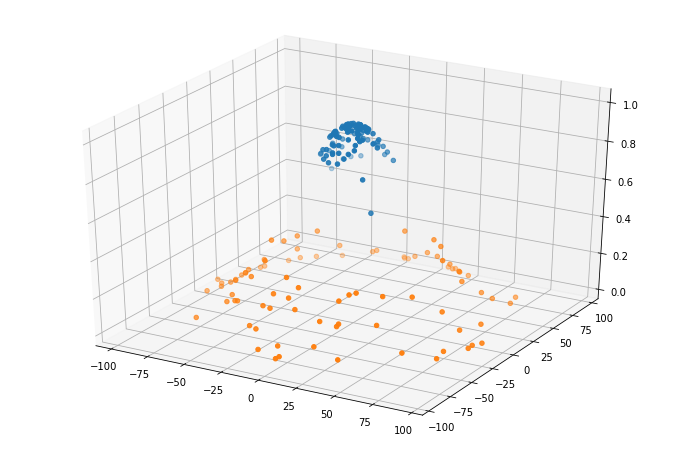

In [18]:
def plot3d(data):
    classes = data['C'].unique()
    for c in classes:
        X = data.where(data['C']==c)['X'].values
        Y = data.where(data['C']==c)['Y'].values
        Z = data.where(data['C']==c)['Z'].values
        plt.gca().scatter(X,Y,Z, label=c)

    plt.grid()

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
plot3d(rings3d)
plt.show()

Proviamo adesso ad allenare un SVM lineare su questi dati:

In [18]:
svm = SVC(kernel='linear')
svm.fit(rings3d.drop(['C'],axis=1),rings3d['C'])
print("Accuracy di training: %0.2f" % svm.score(rings3d.drop(['C'],axis=1),rings3d['C']))

Accuracy di training: 1.00


Il decision boundary trovato è questa volta il piano che soddisfa l'equazione:

\begin{equation}
x w_1 + y w_2 + z w_3 + b = 0
\end{equation}

da cui l'equazione in forma esplicita:

\begin{equation}
z = -\frac{w_1}{w_3}x - \frac{w_2}{w_3} y - \frac{b}{w_3}
\end{equation}

Analogamente a quanto visto in precedenza, gli iperpiani che delimitano il margine soddisfano le equazioni:

\begin{equation}
z = -\frac{w_1}{w_3}x - \frac{w_2}{w_3} y - \frac{b-1}{w_3} \\
z = -\frac{w_1}{w_3}x - \frac{w_2}{w_3} y - \frac{b+1}{w_3}
\end{equation}

Visualizziamo i tre iperpiani e i vettori di supporto:

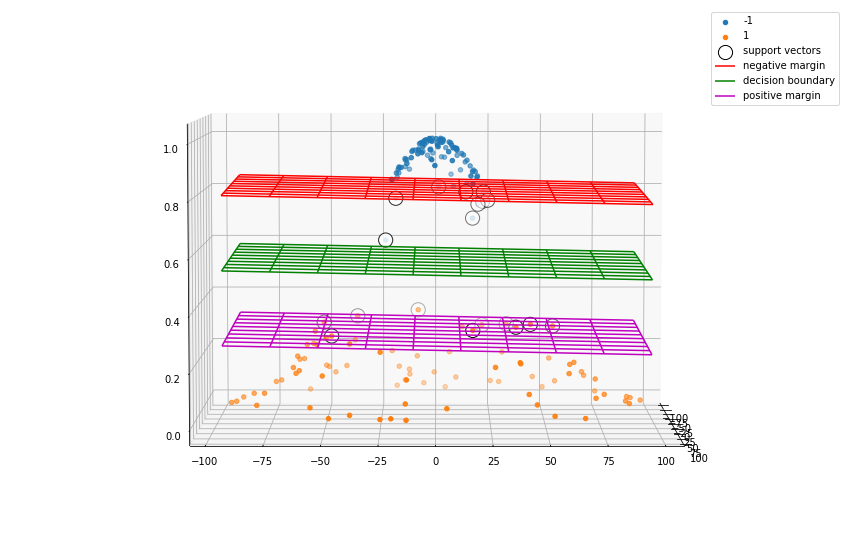

In [19]:
%matplotlib inline
def project3d(x,y,w,b):
    return -w[0]/w[2]*x -w[1]/w[2]*y - b/w[2]

def plot3dall(data,svm):
    w = (svm.dual_coef_.T*svm.support_vectors_).sum(0)
    b = svm.intercept_

    plot3d(data)

    plt.gca().scatter(svm.support_vectors_[:,0], svm.support_vectors_[:,1], svm.support_vectors_[:,2], s=200,
                      facecolor='w' ,edgecolors='k', label='support vectors')

    x,y = np.meshgrid(np.linspace(data.X.min(),data.X.max(),10),np.linspace(data.Y.min(),data.Y.max(),10))
    
    z1 = project3d(x,y,w,b+1)
    z2 = project3d(x,y,w,b)
    z3 = project3d(x,y,w,b-1)
    
    plt.gca().plot_wireframe(x,y,z1,label='negative margin', color='r')
    plt.gca().plot_wireframe(x,y,z2,label='decision boundary', color='g')
    plt.gca().plot_wireframe(x,y,z3,label='positive margin',color='m')


from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
plot3dall(rings3d,svm)
plt.legend()
ax.view_init(azim=0, elev=5)
plt.show()

### 14.3.2 Corrispondente Soluzione nello Spazio di Partenza (2D)

Abbiamo visto come trasformare il problema in modo da poterlo risolvere con un classificatore lineare. Tuttavia la proiezione dal 2D al 3D **non ha aggiunto nulla di nuovo** ai dati (la componente Z è calcolata a partire da X e Y) e dunque è legittimo chiedersi se possiamo fare qualcosa per classificare i dati **direttamente** nello spazio $XY$.

Torniamo alla prima formulazione della funzione di decisione:

\begin{equation}
y(\mathbf{x})=\mathbf{w}^T \phi(\mathbf{x}) + b
\end{equation}

Nel nostro caso:
 * $\phi$ è la Gaussiana 2D che mappa i punti di coordinate $(X,Y)$ in uno spazio 3D di coordinate $(X,Y,Z)$;
 * $\mathbf{w}$ è il vettore di pesi che definisce il piano che separa i dati **nello spazio 3D**;
 * $b$ è il fattore di bias.

La funzione di decisione "lavora" sui dati trasformati $\phi(\mathbf{x})$, ma è definita come una funzione di $\mathbf{x}$, pertanto i **punti 2D** che definiscono il decision boundary devono soddisfare:

\begin{equation}
\mathbf{w}^T \phi(\mathbf{x}) + b = 0
\end{equation}

Dato che $\phi$ è non lineare, l'equazione del decision boundary sarà non lineare a sua volta. Pertanto potrebbe essere complicato trovarne una funzione analitica. Possiamo però valutare la funzione in diversi punti dello spazio 2D ed evidenziare quei punti per i quali l'equazione è verificata. Vediamo come fare:

In [20]:
#costruiamo una griglia regolare di punti 2D:
X, Y = np.meshgrid(np.linspace(rings3d.X.min(),rings3d.X.max(),100),np.linspace(rings3d.Y.min(),rings3d.Y.max(),100))

#calcoliamo i rispettivi valori di Z applicando la transformazione
Z = np.exp(-((X**2/(2*s**2))+(Y**2/(2*s**2))))

XYZ = np.array([X.ravel(), Y.ravel(), Z.ravel()]) #trasformiamo i punti in una lista 3 x n

#valutiamo la funzione di decisione nei punti X, Y, Z:
w = svm.coef_[0]
b = svm.intercept_
f = w.T.dot(XYZ)+b
#transformiamo i valori in una matrice 100 x 100
F = f.reshape(X.shape)

F contiene adesso, per ogni punto della griglia, le valutazioni della funzione di decisione. Ricordiamo che i punti che cadono nelle aree in cui F è positiva verranno classificati come "positivi", mentre i punti che cadono nelle aree in cui F è negativa verranno classificati come "negativi". Possiamo visualizzare i punti in cui F è esattamente uguale a 0, -1 e 1 per mostrare il decision boundary e i margini trovati da SVM.

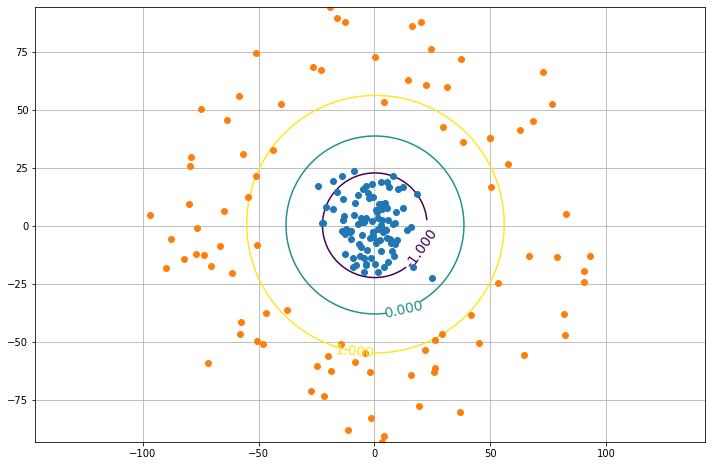

In [21]:
plt.figure(figsize=(12,8))
plot2d(rings)
contour=plt.contour(X,Y,F, levels=[-1,0,1])
plt.clabel(contour, fontsize=14)
plt.show()

### 14.3.3 Kernel Trick

Riassumendo, abbiamo visto come, proiettando i dati in uno spazio a più dimensioni e risolvendo il problema con una classificatore lineare, sia possibile trovare una soluzione **non lineare** nello spazio di partenza. Seguendo l'approccio visto finora però abbiamo bisogno di proiettare **tutti i dati di training** nello spazio 3D per trovare la soluzione di SVM. Inoltre è necessario proiettare nello spazio 3D ogni altro dato che classifichiremo in seguito. Questo processo non è molto efficiente, soprattutto quando lo spazio di destinazione ha molte dimensioni. SVM permette di aggirare il problema definendo la funzione di decisione in modo che essa dipenda solamente da prodotti del tipo:

\begin{equation}
K(\mathbf{x}, \mathbf{x}') = \phi(\mathbf{x}) \phi(\mathbf{x}')
\end{equation}

Un kernel molto utilizzato è il kernel Gaussiano (detto anche Kernel RBF - Radial Basis Function). Il kernel è definito come segue:

\begin{equation}
K(\mathbf{x},\mathbf{x}') =exp(-\frac{||\mathbf{x}-\mathbf{x}'||^2}{2\sigma^2})
\end{equation}

Una notazione equivalente, spesso utilizzata, si ottiene ponendo $\gamma=\frac{1}{2\sigma^2}$. In tal caso:

\begin{equation}
K(\mathbf{x},\mathbf{x}') = exp(-\gamma ||\mathbf{x}-\mathbf{x}'||^2)
\end{equation}

Vediamo come allenare un modello SVM con kernel RBF mediante **scikit-learn**:

In [55]:
svm = SVC(kernel='rbf', gamma=0.0001)
svm.fit(rings.drop(['C'],axis=1),rings.C)
print("Accuracy su training set: %0.2f" % svm.score(rings.drop(['C'],axis=1),rings.C))

Accuracy su training set: 1.00


Visualizziamo il contour plot per la funzione di decisione:

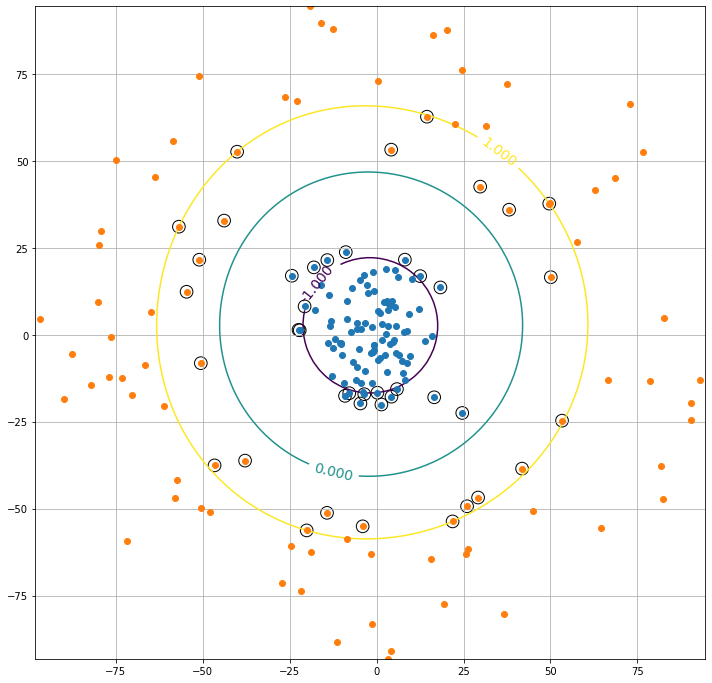

In [56]:
def plot2dcontour(data,svm):
    #costruiamo una griglia regolare di punti 2D:
    X, Y = np.meshgrid(np.linspace(data.X.min(),data.X.max(),100),np.linspace(data.Y.min(),data.Y.max(),100))
        
    #invece di calcolare i valori della funzione di decisione a mano, 
    #richiamiamo la funzione di decisione dell'oggeto svm
    F = svm.decision_function(np.c_[X.ravel(), Y.ravel()])
    F = F.reshape(X.shape)

    plot2d(data)
    contour=plt.contour(X,Y,F, levels=[-1,0,1])
    plt.clabel(contour, fontsize=14)
    
    plt.scatter(svm.support_vectors_[:,0], svm.support_vectors_[:,1], 160,
                facecolors='none',edgecolors='k', label='support vectors')
    

plt.figure(figsize=(12,12))
plot2dcontour(rings,svm)
plt.show()

Torniamo all'esempio degli iris di Fisher e vediamo cosa succede allenando un SVM con kernel RBF:

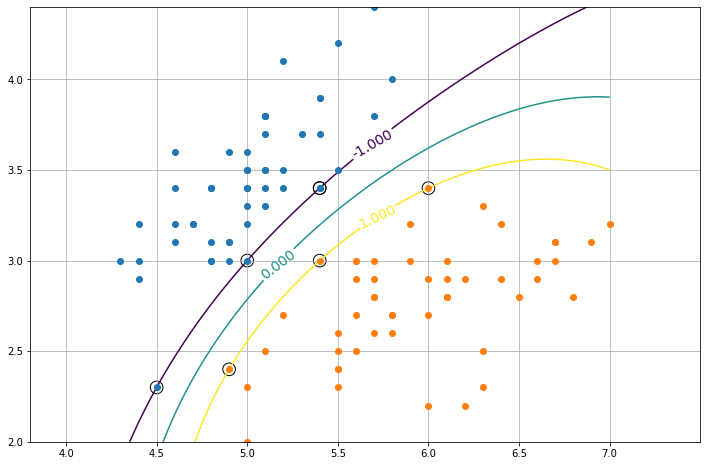

Accuracy su training set: 1.00


In [24]:
import pandas as pd
#eliminiamo la classe virginica
data = fisher.data[fisher.data['Species']!='virginica'].dropna()
#costruiamo un dataframe vuoto
df = pd.DataFrame()
#inserieamo le prime due feature e chiamiamole X e Y
df['X'] = data['Sepal.Length']
df['Y'] = data['Sepal.Width']
#inseriamo una colonna "C" che contenga le classi
df['C'] = data['Species']

data = df

#utilizziamo C=100 per ottenere un hard margin
svm = SVC(kernel='rbf', C=100, gamma='scale') #gamma default 'scale' = 1 / (n_features * X.var())
svm.fit(data.drop(['C'],axis=1),data['C'])

plt.figure(figsize=(12,8))
plot2dcontour(data,svm)
plt.show()
print("Accuracy su training set: %0.2f" % svm.score(data.drop(['C'],axis=1),data['C']))

## 14.4. SVM Multiclasse, Normalizzazione dei dati e Ottimizzazione dei Parametri

Finora abbiamo visto dei semplici esempi di classificazione lineare e non lineare nel caso in cui le features fossero bidimensionali. In realtà SVM è un classificatore molto potente e può essere applicato a problemi ben più complessi di quelli visti fino ad ora. Inoltre, abbiamo visto che esistono una serie di parametri (tipo di kernel, parametri del kernel e costo C) che vanno ottimizzati. Vedremo che l'accurata scelta di questi parametri, unita ad una opportuna normalizzazione dei dati, può portare a sostanziali miglioramenti nelle performance del classificatori.

Abbiamo visto che SVM è di fatto un classificatore binario. Tuttavia è possibile utilizzarlo per risolvere problemi di classificazione multiclasse utilizzando due approcci principali:
 * One-vs-rest: viene allenato un classificatore binario per ogni classe che sia capace di distinguere gli elementi della data classe da tutti gli altri,
 * One-vs-one: viene allenato un classificatore binario per ogni coppia di classi diverse. La classe finale viene scelta mediante una procedura di voting.
 
Scikit-learn permette di implementare questi meccanismi in maniera trasparente. Vediamo un caso di classificazione multiclasse un po' più complesso di quelli visti finora. Considereremo il dataset DIGITS, che contiene digitalizzazioni di cifre da 0 a 9 scritte a mano.  Carichiamo il dataset e visualizziamo qualche campione:

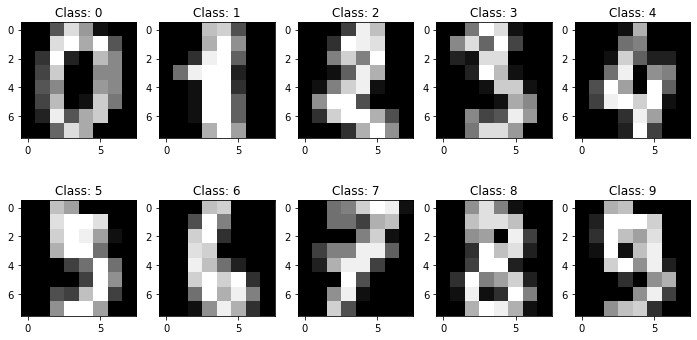

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
digits = load_digits()

#Le immagini sono contenute all'interno della matrice 1797 x 64 digits['data']
#Ogni riga della matrice è una immagine 8x8, rappresentata come un vettore di 64 valori 
#(i valori di grigio dell'immagine)


#Dentro digits['target'] è contenuta una lista di 1797 indici numerici che rappresentano
#le classi a cui appartengono le immagini del dataset

#Le classi vanno da 0 a 9 e indicano la cifra raffigurata nell'immagine

plt.figure(figsize=(12,6))
#stampiamo una immagine di esempio per ogni classe
for i in range(10):
    plt.subplot(2,5,i+1)
    #devo usare reshape per trasformare il vettore di 64 valori in una immagine 8x8
    plt.title("Class: {}".format(i))
    plt.imshow(digits['data'][digits['target']==i][0].reshape((8,8)),cmap='gray')

Selezioniamo adesso due sottoinsiemi di training e test. Per ridurre il carico computazionale non utilizzeremo tutte le immagini del dataset. Prenderemo solo le prime e le ultime mille:

In [26]:
#otteniamo una permutazione casuale degli indici delle immagini del dataset
perm = np.random.permutation(len(digits['data']))
#applichiamo la permutazione ai dati e alle etichette
data = digits['data'][perm]
target = digits['target'][perm]

#prendiamo le prime mille immagini per training
training_data = data[:1000]
training_target = target[:1000]

#prendimao le ultime mille immagini per testing
testing_data = data[-1000:]
testing_target = target[-1000:]

Proviamo adesso ad allenare un classificatore lineare e valutiamone le performance sia sul training set che sul test set:

In [27]:
svm = SVC(kernel='linear')
svm.fit(training_data,training_target)
print("Accuracy sul training set: %0.2f"%svm.score(training_data,training_target))
print("Accuracy sul testing set: %0.2f"%svm.score(testing_data,testing_target))

Accuracy sul training set: 1.00
Accuracy sul testing set: 0.99


Il classificatore ottiene già delle performance molto alte. Possiamo migliorarle? Proviamo ad usare un kernel Gaussiano:

In [28]:
svm = SVC(kernel='rbf', gamma='auto')
svm.fit(training_data,training_target)
print("Accuracy sul training set: %0.2f"%svm.score(training_data,training_target))
print("Accuracy sul testing set: %0.2f"%svm.score(testing_data,testing_target))

Accuracy sul training set: 1.00
Accuracy sul testing set: 0.35


Le performance di questo classificatore non lineare sono piuttosto deludenti, il che ci porterebbe a dire che il kernel lineare funziona meglio del kernel RBF in questo caso. Tuttavia, se guardiamo all'accuracy sul training set ci accorgiamo che il classificatore riesce a suddividere lo spazio di training, ma soffre di **overfitting** (la soluzione trovata non va bene per i dati di test). 

In pratica, quando si allena un modello SVM, è buona pratica **normalizzare** i dati in modo da evitare che alcune dimensioni si trovino su range diversi (ad esempio, alcuni dimensioni potrebbero sistematicamente presentare valori più alti di altre). Ad esempio l'oggetto **MinMaxScaler** permette di normalizzare i dati nel range [0,1]. Per ottenere questo risultato vengono calcolati minimo massimo e deviazione standard dei valori lungo ogni dimensione nei dati di training. La stessa normalizzazione (con gli stessi parametri) dovrà dunque essere applicata anche sul test set:

In [29]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
#imparo i parametri per lo scaling e applico la trasformazione
training_data = mms.fit_transform(training_data)
#applicato la trasformazione
testing_data = mms.transform(testing_data)

Proviamo adesso ad allenare SVM con kernel RBF:

In [30]:
svm = SVC(kernel='rbf', gamma='auto')
svm.fit(training_data,training_target)
print("Accuracy sul training set: %0.2f"%svm.score(training_data,training_target))
print("Accuracy sul testing set: %0.2f"%svm.score(testing_data,testing_target))

Accuracy sul training set: 0.96
Accuracy sul testing set: 0.96


Confrontando i risultati sul test set possiamo osservare che **normalizzare i dati in input** in maniera appropriata è importante per allenare un modello SVM. Possiamo ottenere risultati migliori? Restano ancora almeno altri due valori da ottimizzare. Proviamo a vedere cosa succede cambiando il valore di $\gamma$:

In [31]:
svm = SVC(kernel='rbf',gamma=0.1)
svm.fit(training_data,training_target)
print("Accuracy sul training set: %0.2f"%svm.score(training_data,training_target))
print("Accuracy sul testing set: %0.2f"%svm.score(testing_data,testing_target))

Accuracy sul training set: 0.99
Accuracy sul testing set: 0.98


I parametri da ottimizzare possono essere tanti. La strategia più utilizzata per trovare quelli ottimali consiste nell'effettuare una **grid search**. In pratica si scelgono alcuni parametri plausibili e si provano diverse combinazioni di parametri. Alla fine si sceglie il modello che dà risultati migliori. La procedura di training e selezione dei parametri avviene **esclusivamente sul training set**. Per evitare l'overfitting, durante la procedura di ricerca dei parametri, una parte del dataset viene usata per allenare il modello SVM e la restante parte per valutarne le performance mediante una tecnica detta di **Cross Validation (CV)**. Per effettuare la **grid search** possiamo utilizzare l'oggetto GridSearchCV di scikit-learn:

In [32]:
from sklearn.model_selection import GridSearchCV
#definiamo la griglia di parametri. Verranno provate tutte le combinazioni!
param_grid = [
  {'C': [1, 10, 100], 'kernel': ['linear']}, #parametri da utilizzare con kernel lineare
  {'C': [1, 10, 100], 'gamma': [0.01, 0.05, 0.001], 'kernel': ['rbf']} #parametri da utilizzare con kernel rbf
 ]
#definiamo l'oggetto Grid Search
#Passando l'argomento verbose, possiamo ottenere informazioni aggiuntive
#n_jobs permette di effettuare più test in parallelo
gs = GridSearchCV(SVC(), param_grid, verbose=1, n_jobs=2, cv=5)

#avviamo la ricerca.
gs.fit(training_data,training_target)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:    3.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'C': [1, 10, 100], 'kernel': ['linear']},
                         {'C': [1, 10, 100], 'gamma': [0.01, 0.05, 0.001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

Calcoliamo adesso le performance del migliore modello:

In [33]:
print("Accuracy sul test set per il modello ottimizzato: %0.2f" % gs.score(testing_data,testing_target))

Accuracy sul test set per il modello ottimizzato: 0.99


Possiamo anche ottenere il modello migliore trovato e visualizzarne i parametri come segue:

In [34]:
svm = gs.best_estimator_
print(svm)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Alleniamo il modello con i parametri ottimali e visualizziamo il report:

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
best_svm = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
best_svm.fit(training_data,training_target)

y_pred_best_svm = best_svm.predict(testing_data)

print("SVM\n")
print("\nConfusion Matrix:")
print(confusion_matrix(testing_target, y_pred_best_svm))
print("\nClassification Report")
print(classification_report(testing_target, y_pred_best_svm))
print("Accuracy")
print(accuracy_score(testing_target, y_pred_best_svm, normalize=True))

SVM


Confusion Matrix:
[[104   0   0   0   0   0   0   0   0   0]
 [  0 106   0   0   0   0   0   0   0   0]
 [  0   0  97   0   0   0   0   0   0   0]
 [  0   0   1  95   0   1   0   0   0   0]
 [  0   0   0   0 100   0   0   0   0   0]
 [  0   0   0   0   0  80   0   0   0   1]
 [  0   0   0   0   1   0 111   0   0   0]
 [  0   0   0   0   0   0   0 103   0   1]
 [  0   0   0   0   0   0   0   0  98   0]
 [  0   0   0   0   0   1   0   1   1  98]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00       106
           2       0.99      1.00      0.99        97
           3       1.00      0.98      0.99        97
           4       0.99      1.00      1.00       100
           5       0.98      0.99      0.98        81
           6       1.00      0.99      1.00       112
           7       0.99      0.99      0.99       104
           8       0.99      1.00  

## - SVM - Fine